# System Setup

Install system development libraries.

In [1]:
%%capture
!add-apt-repository -y ppa:dns/gnu
!apt-get update
!apt-get install -y libgsl-dev

Installing CDT.

In [2]:
%%capture
!pip install cdt

Loading R extension for Jupyter Lab.

In [3]:
%load_ext rpy2.ipython

Installing R packages required by CDT. It should take around five minutes...

In [4]:
%%capture
%%R
options(Ncpus = parallel::detectCores())
install.packages(c("devtools", "BiocManager"))
BiocManager::install(c("pcalg", "kpcalg", "SID"), ask = FALSE)
devtools::install_github("Diviyan-Kalainathan/RCIT")

Disabling warnings.

In [5]:
import warnings
warnings.filterwarnings("ignore")

Importing packages.

In [6]:
import cdt
import networkx as nx

# Causal Discovery with the Toolbox (CDT)

By Alessio Zanga & Fabio Stella

## Abstract

This notebook represents a quick-start guide to causal discovery using the Causal Discovery Toolbox package.

## Generate a Dataset

Import a dataset generator.

In [7]:
from cdt.data import AcyclicGraphGenerator

Construct the generator given input parameters.

In [8]:
generator = AcyclicGraphGenerator(
    causal_mechanism = 'linear',   # Type of functions in the functional set F (see Structural Causal Models).
    noise = 'gaussian',            # Type of noise terms of the set of hidden variables U.
    nodes = 10,                    # Cardinality of the set of observed variables V.
    parents_max = 2,               # Max number of parents per node.
    npoints = int(1e6),            # Sample size.
)

Sample from the generator.

In [9]:
data, true_graph = generator.generate()

It returns a Pandas DataFrame and a Networkx directed acyclic graph.

In [10]:
type(data), type(true_graph)

(pandas.core.frame.DataFrame, networkx.classes.digraph.DiGraph)

In [11]:
data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
mean,7.501058e-16,1.293472e-16,-1.086050e-15,2.544880e-16,4.477556e-16,-3.410605e-18,3.979039e-17,3.917648e-16,-4.378933e-16,-7.363781e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.848841e+00,-4.625864e+00,-4.635913e+00,-4.299066e+00,-4.389571e+00,-1.812006e+00,-2.516747e+00,-4.204822e+00,-3.176924e+00,-5.272031e+00
25%,-7.996727e-01,-6.719782e-01,-6.708583e-01,-6.832690e-01,-6.784904e-01,-7.310039e-01,-8.857041e-01,-7.143978e-01,-7.838332e-01,-8.012154e-01
50%,2.375837e-01,2.089294e-02,1.882967e-02,6.968236e-02,5.714328e-02,-4.280446e-01,8.746214e-02,1.152198e-01,7.239657e-02,-1.316101e-02
75%,7.335722e-01,6.907385e-01,6.889335e-01,7.146049e-01,7.096974e-01,1.267039e+00,8.700794e-01,7.418777e-01,7.765086e-01,8.580390e-01
max,3.288116e+00,4.576647e+00,4.624603e+00,4.280217e+00,4.419768e+00,2.534398e+00,2.347611e+00,3.813633e+00,3.009439e+00,2.671767e+00


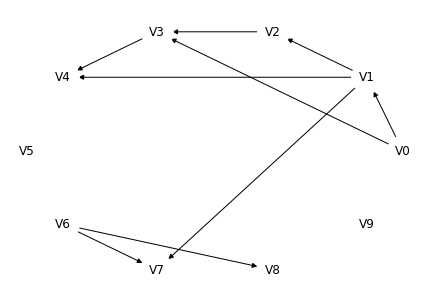

In [12]:
def _draw(G):
    nx.draw_circular(G, node_size=1000, node_color="white", with_labels=True)

_draw(true_graph)

## Learn a structure

Import a learning algorithm.

In [13]:
from cdt.causality.graph import PC

Build a discover.

In [14]:
discover = PC(
    CItest = "gaussian",     # Conditional independence test type.
    alpha = 0.01,            # Significance level alpha.
)

Run the discovery algorithm.

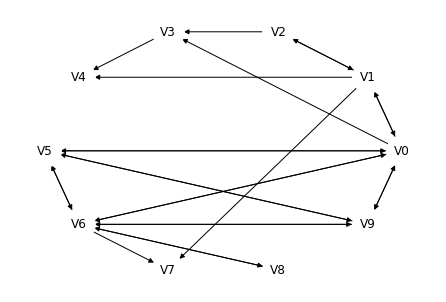

In [15]:
predicted_graph = discover.predict(data)
_draw(predicted_graph)

## Evaluation

Import evaluation metrics.

In [16]:
from cdt.metrics import (precision_recall, SID, SHD)

Compute the metrics given the true and predicted graphs.

In [17]:
scores = {
    "Area Under the precision/recall Curve (AUC)": precision_recall(true_graph, predicted_graph)[0],
    "Structural Hamming Distance (SHD)": SHD(true_graph, predicted_graph),
    "Structural Intervention Distance (SID)": int(SID(true_graph, predicted_graph)),
}
scores

{'Area Under the precision/recall Curve (AUC)': 0.6875,
 'Structural Hamming Distance (SHD)': 15,
 'Structural Intervention Distance (SID)': 17}